In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.preprocessing import LabelEncoder
import os
import pickle
%matplotlib inline

In [64]:
import sklearn
print(sklearn.__version__)

1.5.1


In [65]:
df = pd.read_csv("../data/dataset.csv")

In [66]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.shape

(4920, 18)

In [68]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [70]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [71]:
df = df.fillna(0)

In [72]:
df["Symptom_4"].value_counts()

Symptom_4
 high_fever                      378
0                                348
 lethargy                        222
 sweating                        216
 yellowish_skin                  216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 bloody_stool                     96
 swelling_of_stomach              96
 blurred_and_distorted_vision     96
 movement_stiffness               96
 hip_joint_pain                   96
 restlessness                     96
 obesity                          96
 silver_like_dusting              96
 spinning_movements               90
 mood_swings                      90
 red_sore_around_nose             84
 dizziness                        84
 abdominal_pain                   84
 continuous_feel_of_urine   

In [73]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

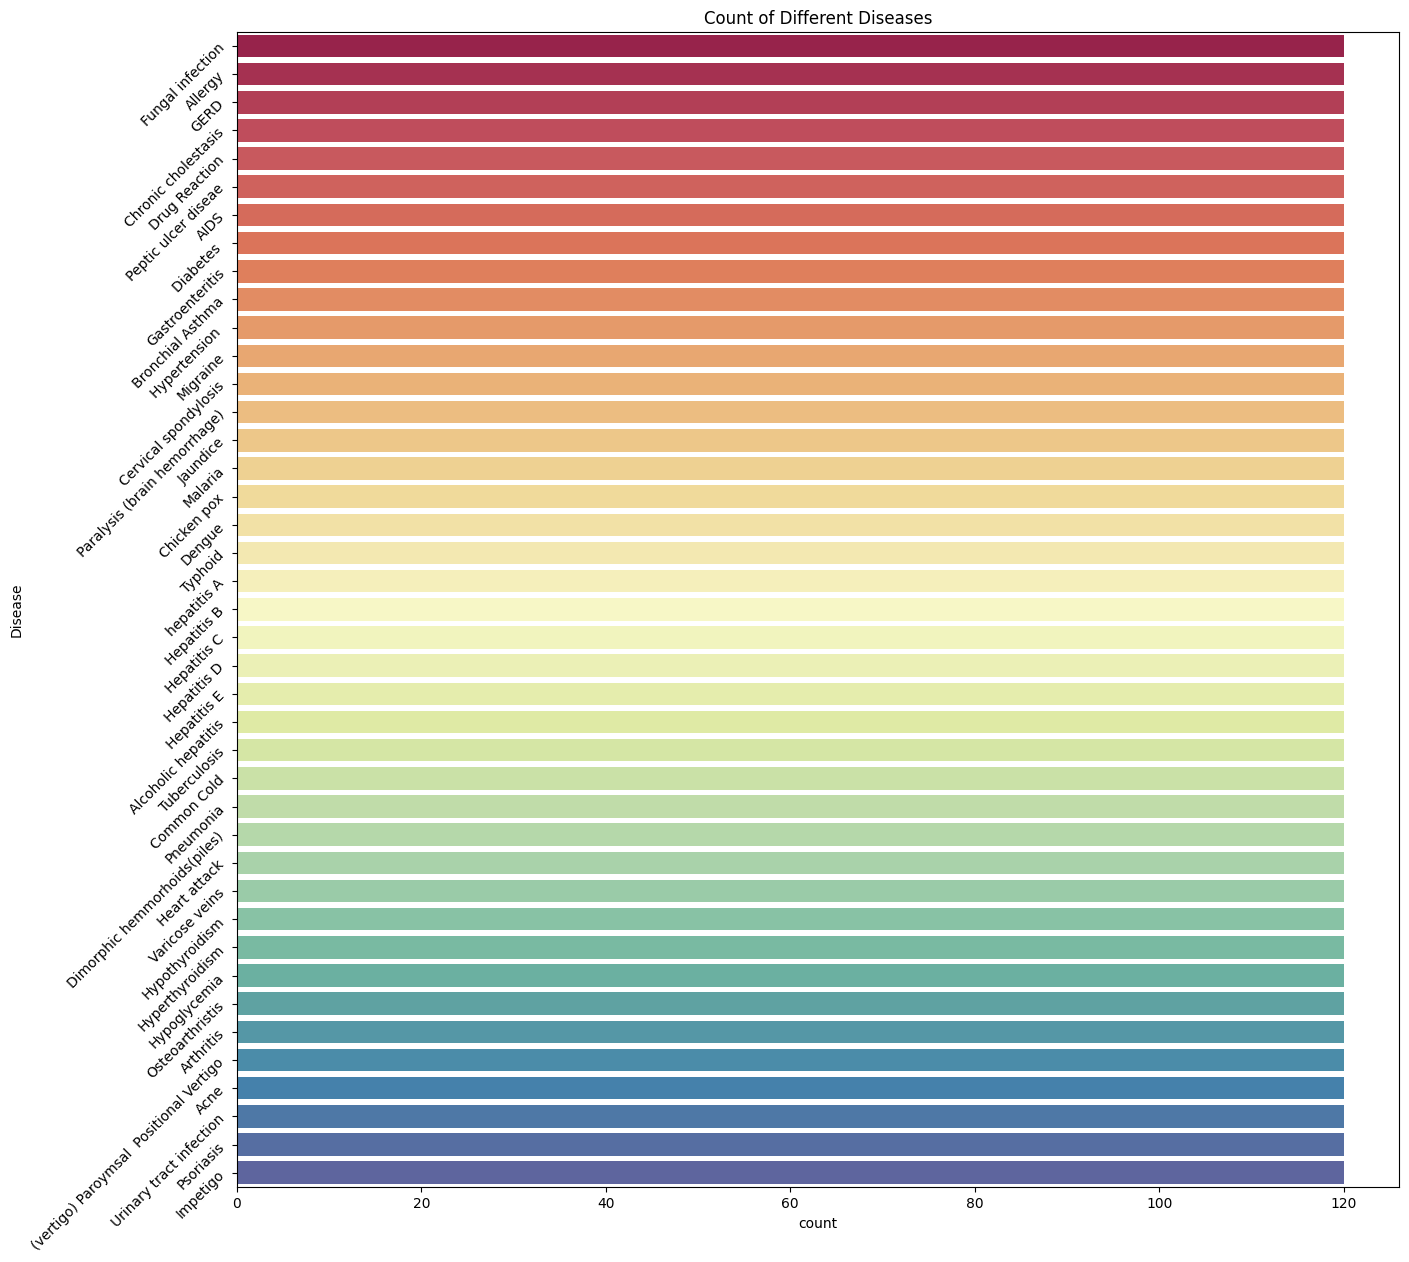

In [74]:
plt.figure(figsize=(15, 15))
sns.countplot(y="Disease", data=df, hue="Disease", dodge=False, palette="Spectral", legend=False)
plt.yticks(rotation=45)
plt.title("Count of Different Diseases")
plt.show()

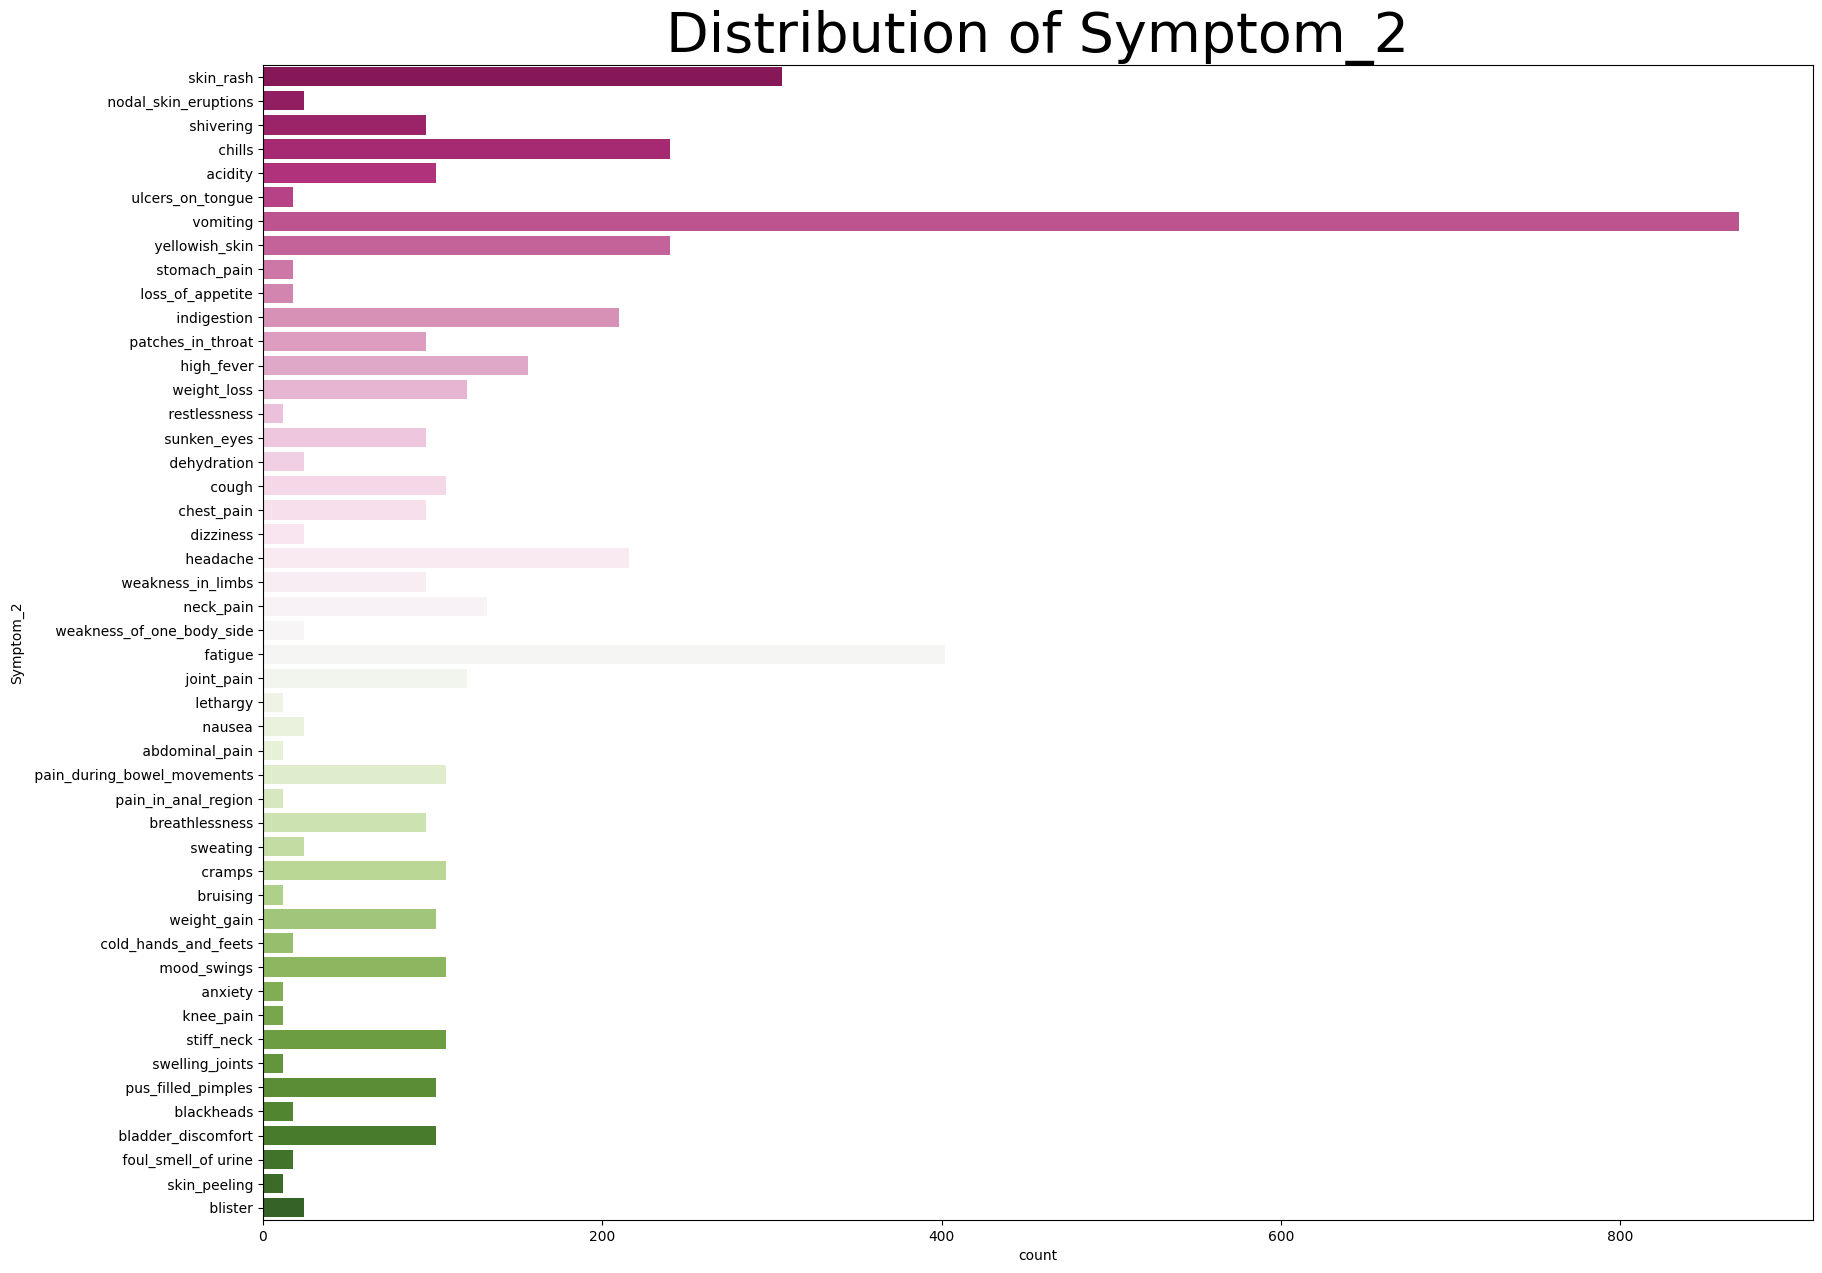

In [75]:
plt.figure(figsize=(20, 15))
sns.countplot(y="Symptom_2", data=df, hue="Symptom_2", dodge=False, palette="PiYG", legend=False)
plt.title("Distribution of Symptom_2",fontsize=40)
plt.show()

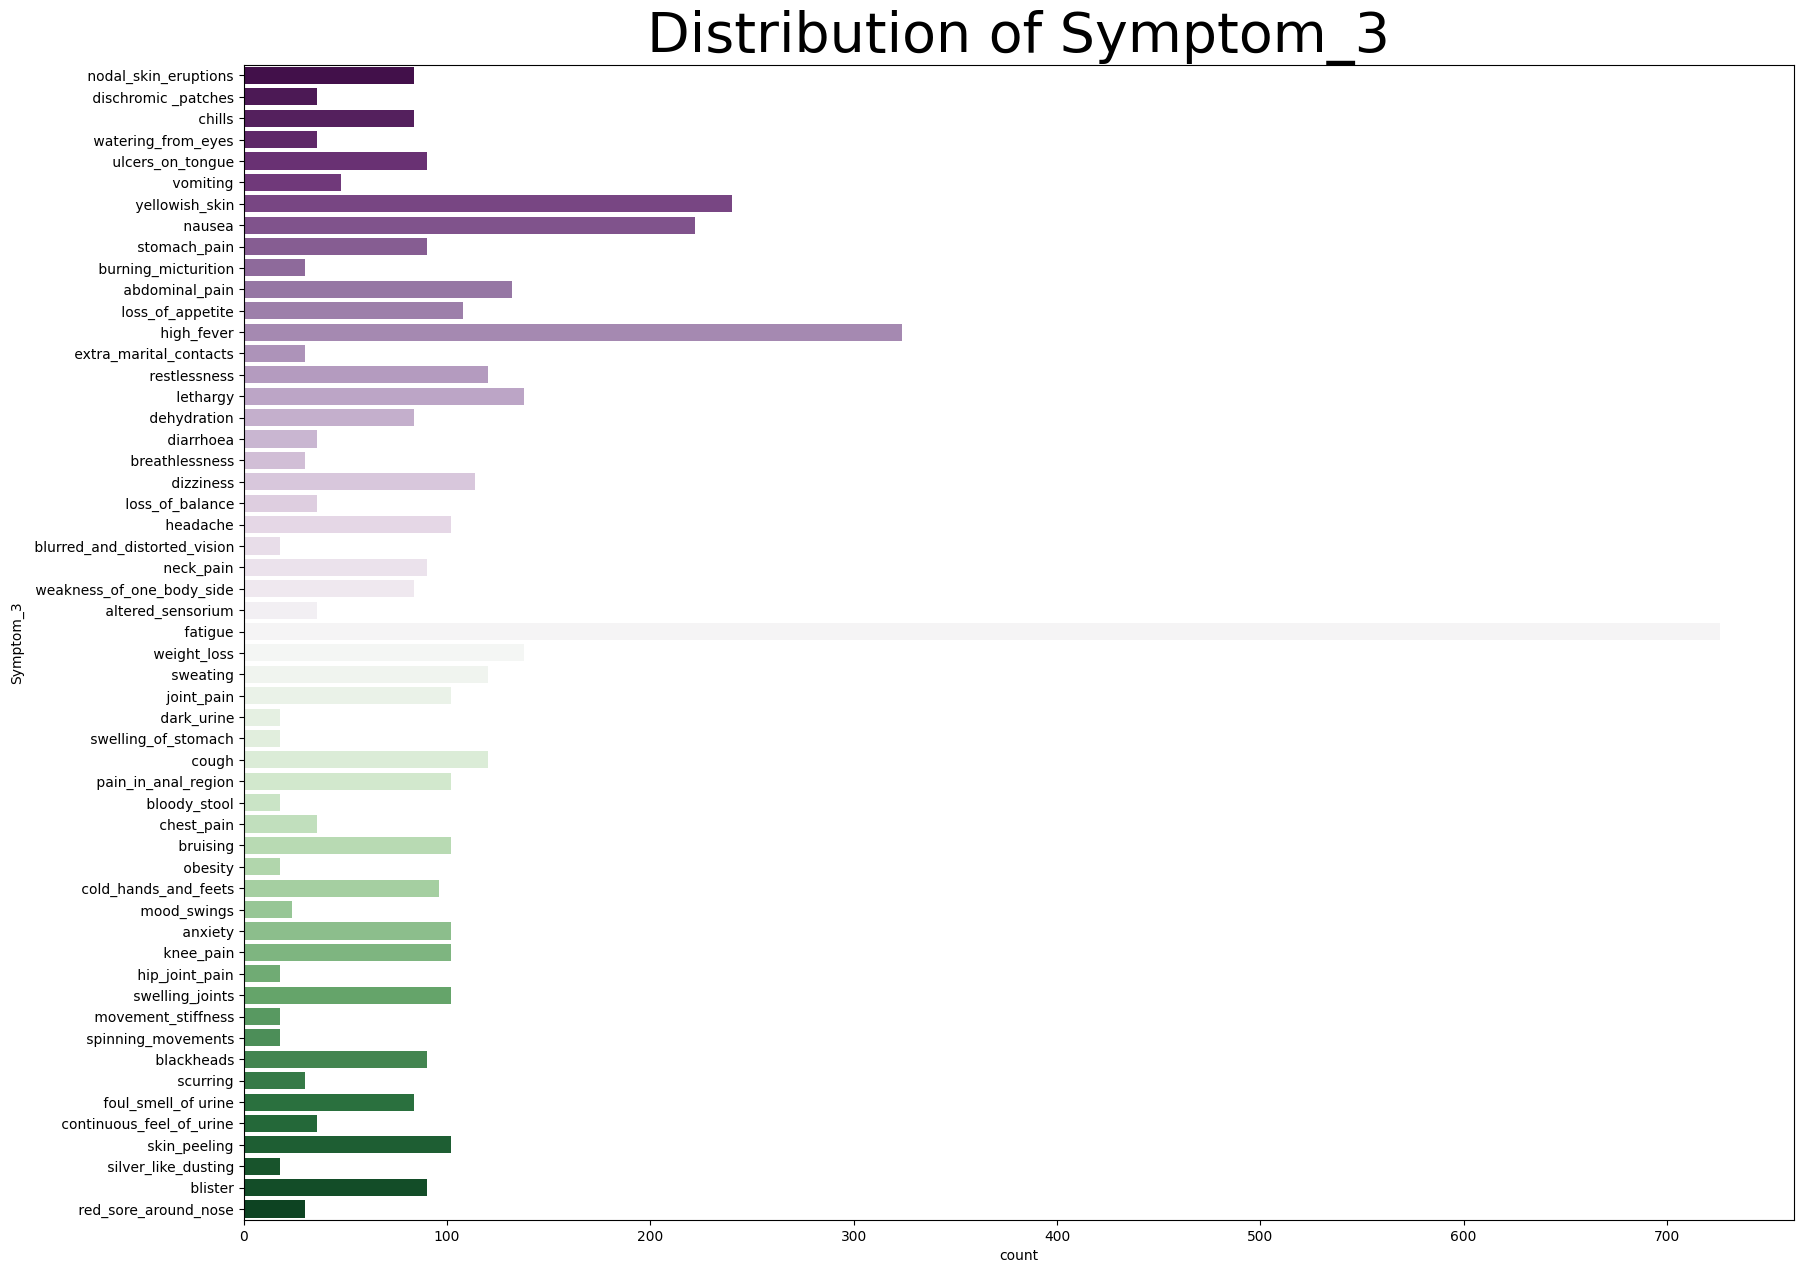

In [76]:
plt.figure(figsize=(20, 15))
sns.countplot(y="Symptom_3", data=df, hue="Symptom_3", dodge=False, palette="PRGn", legend=False)
plt.title("Distribution of Symptom_3",fontsize=40)
plt.show()

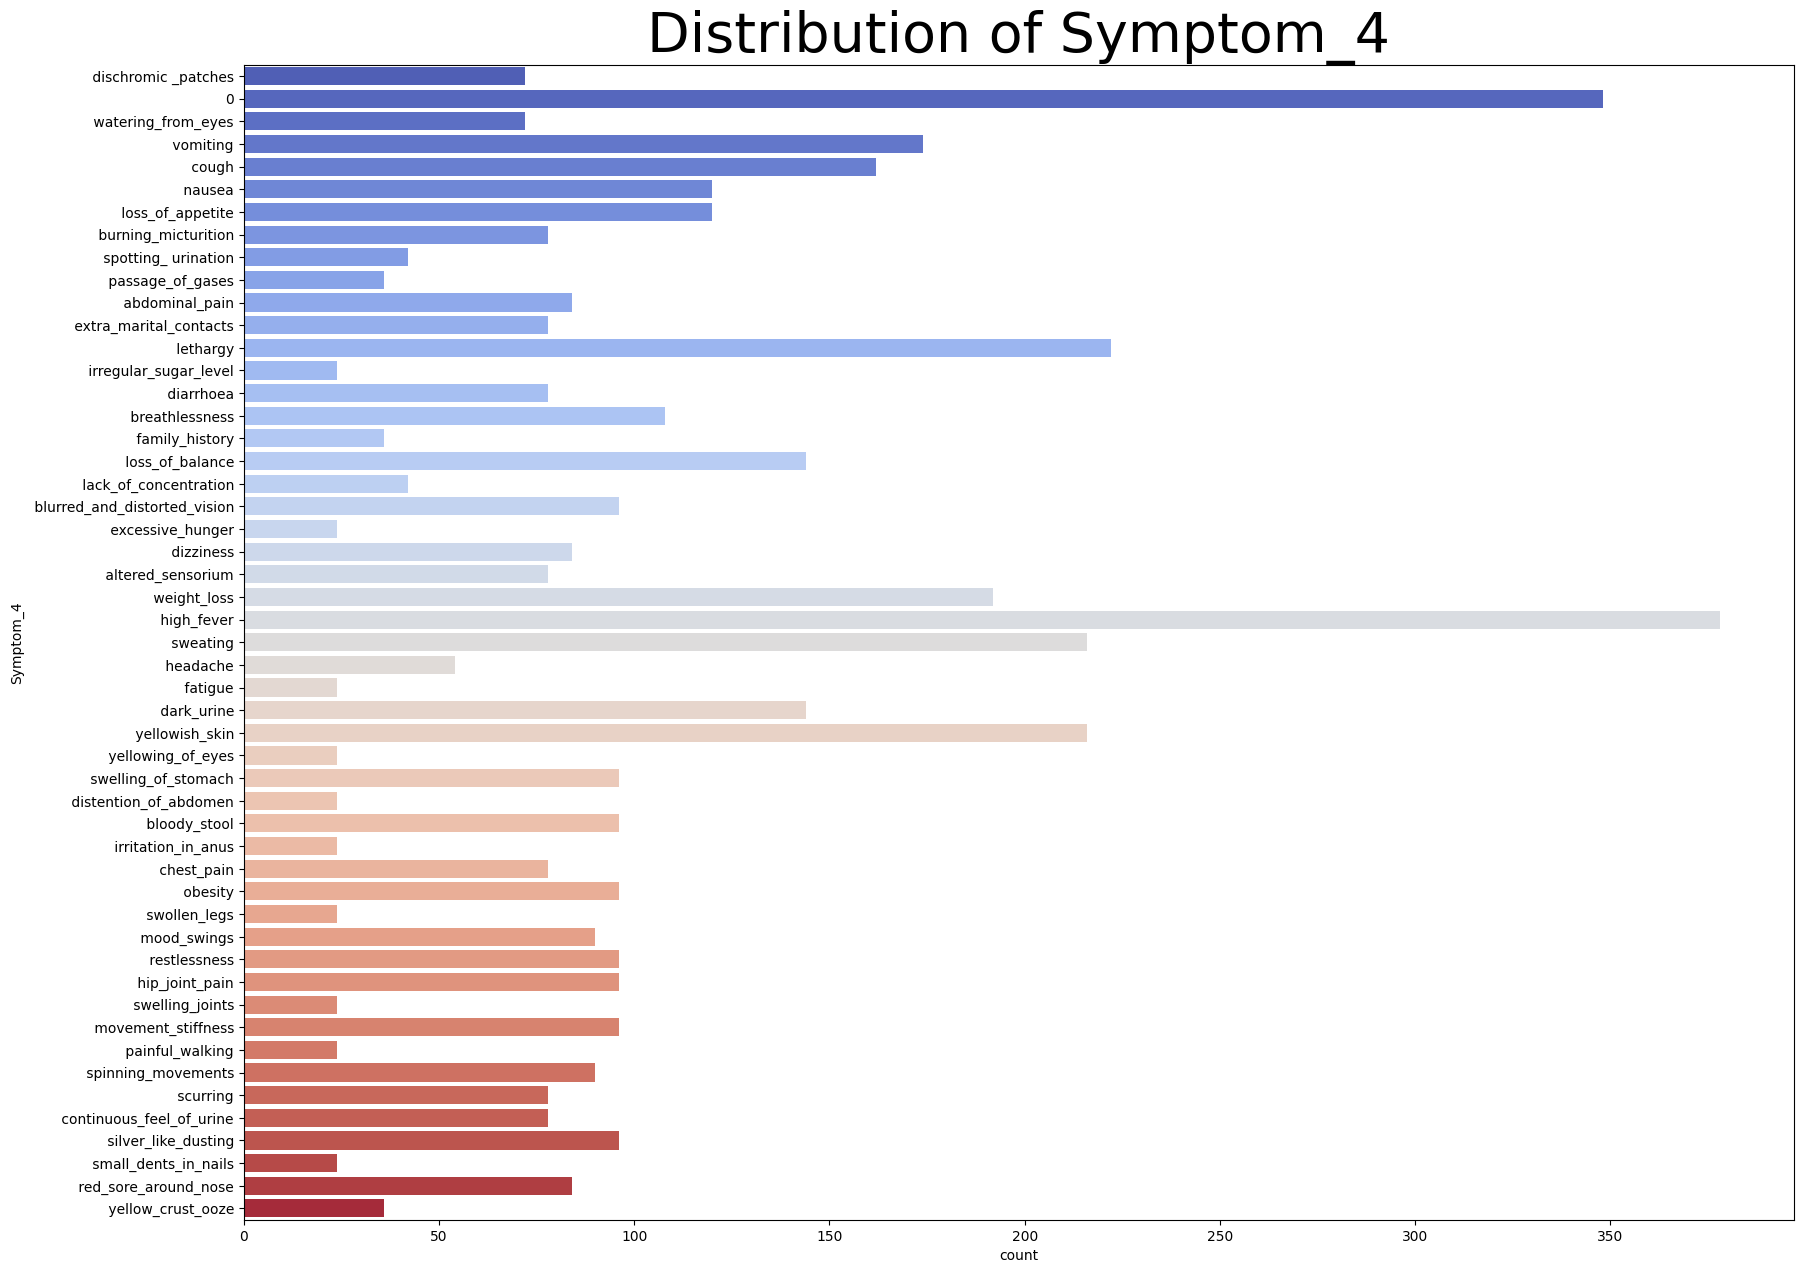

In [77]:
plt.figure(figsize=(20, 15))
sns.countplot(y="Symptom_4", data=df, hue="Symptom_4", dodge=False, palette="coolwarm", legend=False)
plt.title("Distribution of Symptom_4",fontsize=40)
plt.show()

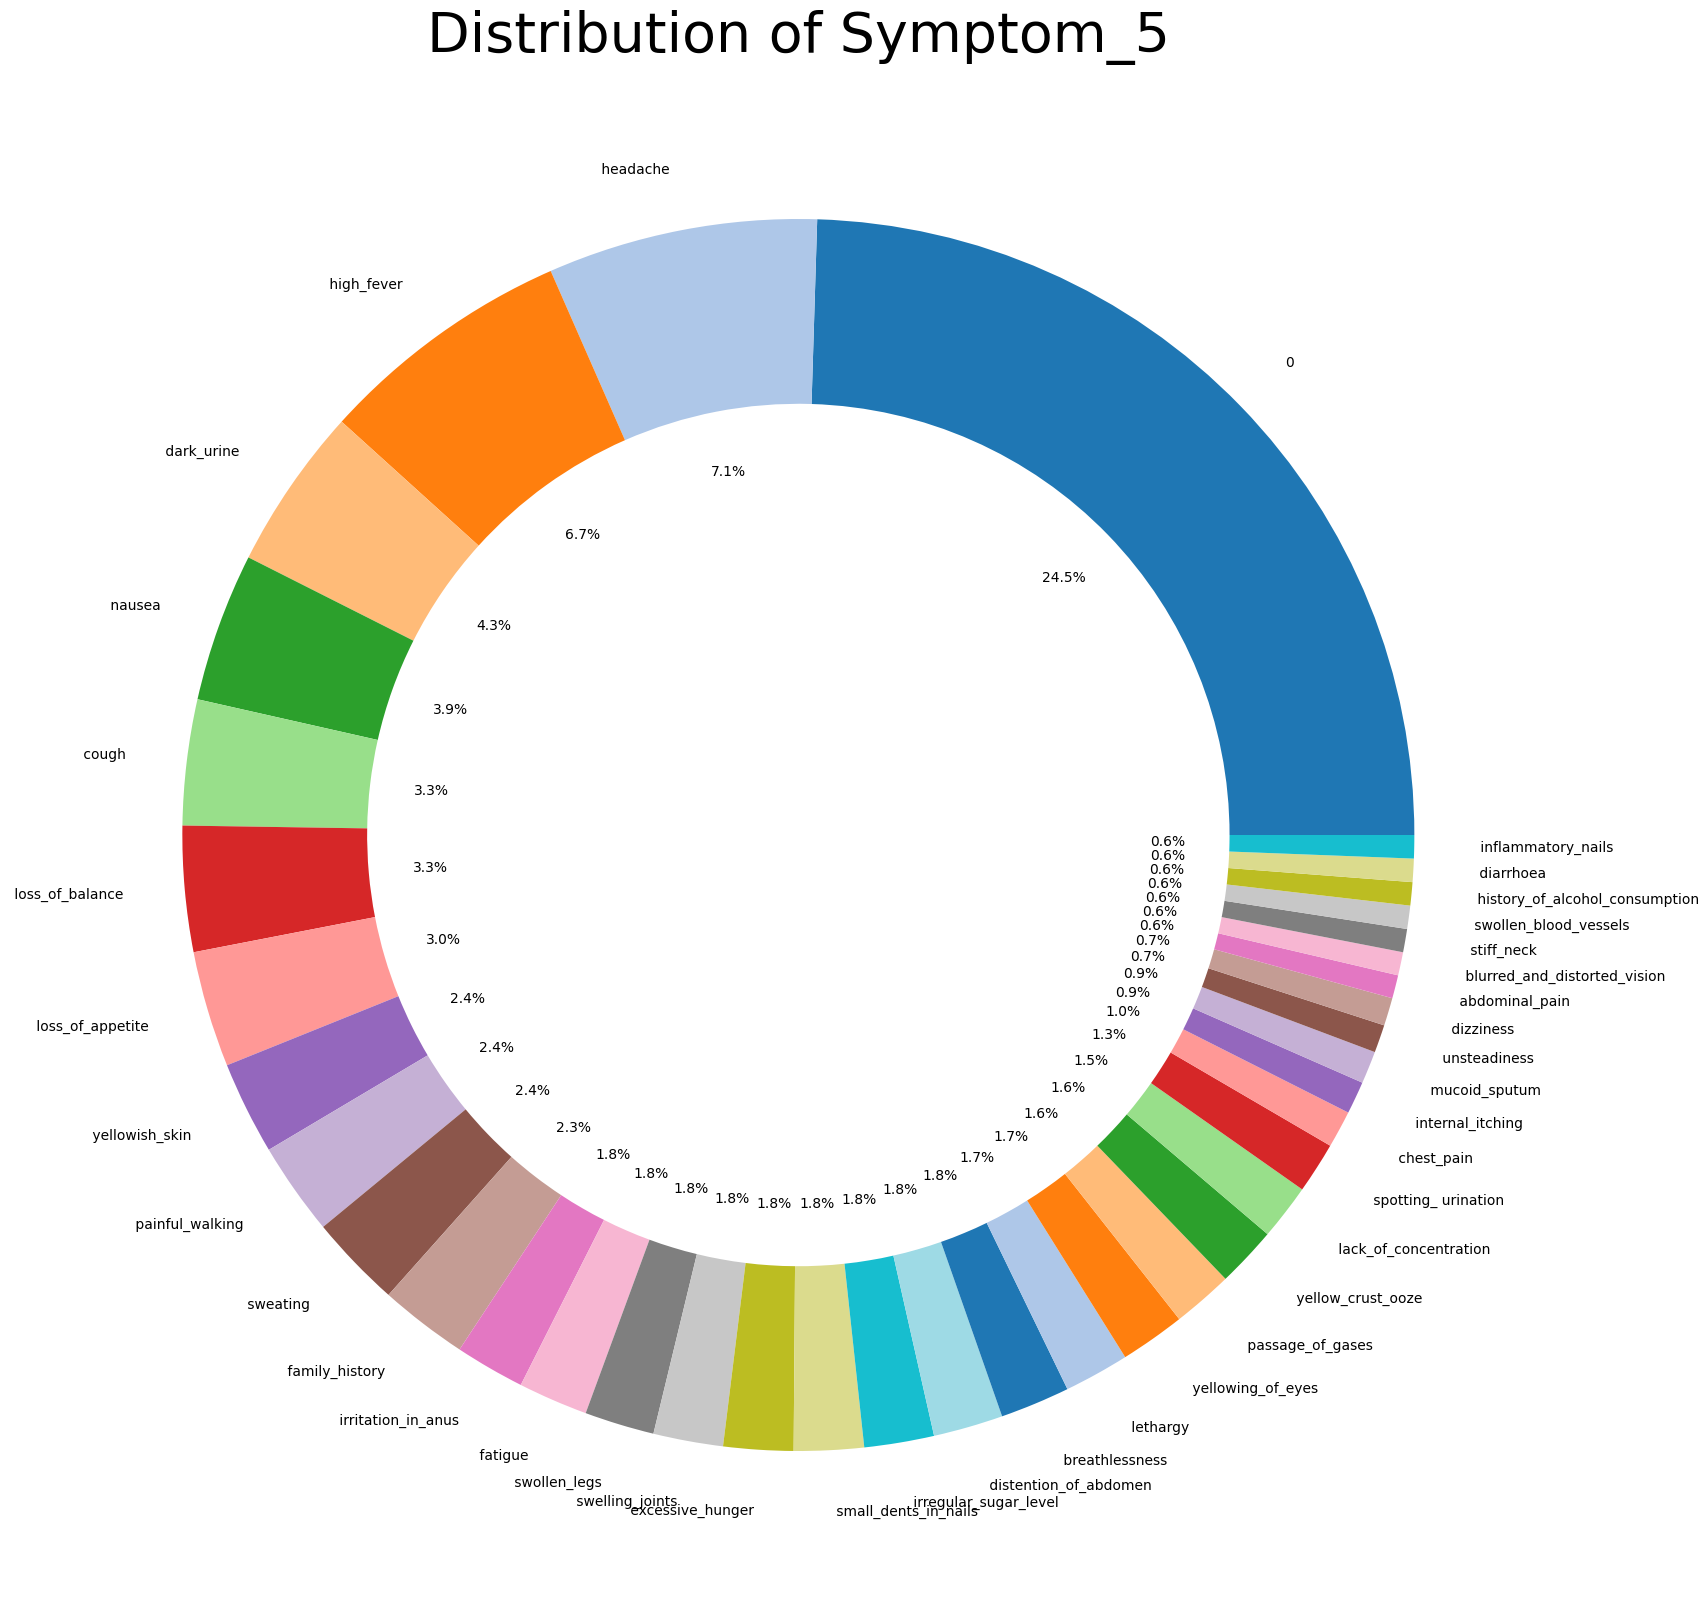

In [78]:
symptom_5_counts = df["Symptom_5"].value_counts()

plt.figure(figsize=(20, 20))
plt.pie(symptom_5_counts, labels=symptom_5_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_5_counts)], wedgeprops=dict(width=0.3))
plt.title("Distribution of Symptom_5", fontsize=40)
plt.show()

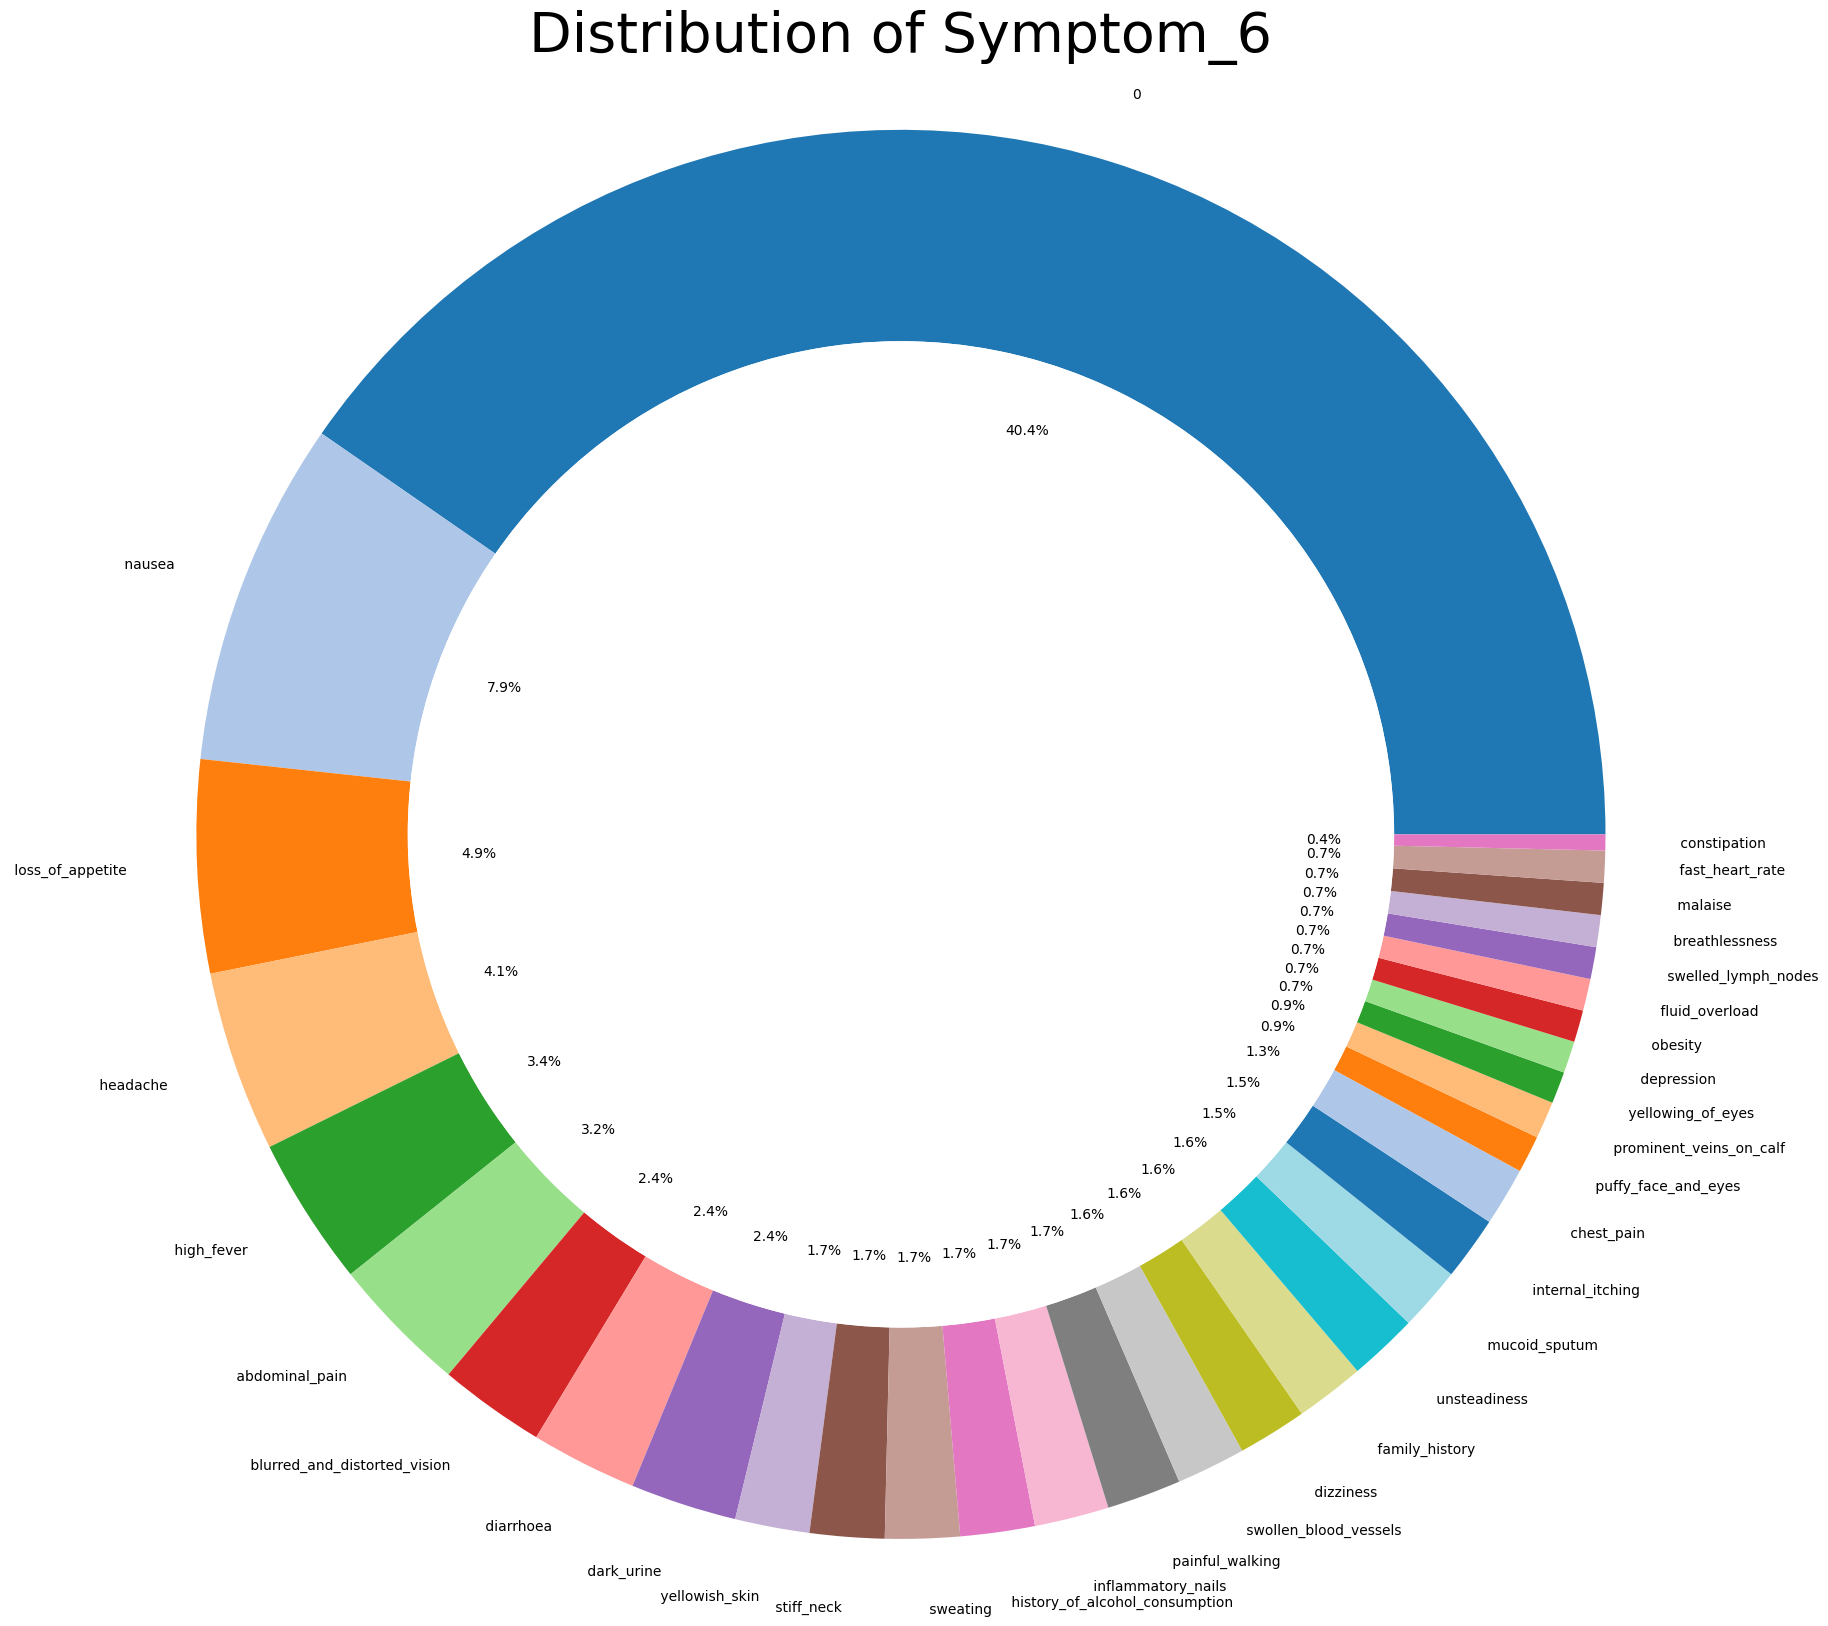

In [79]:
plt.figure(figsize=(20, 20))
symptom_6_counts = df["Symptom_6"].value_counts()
plt.pie(symptom_6_counts, labels=symptom_6_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_6_counts)], wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.title("Distribution of Symptom_6",fontsize=40)
plt.show()

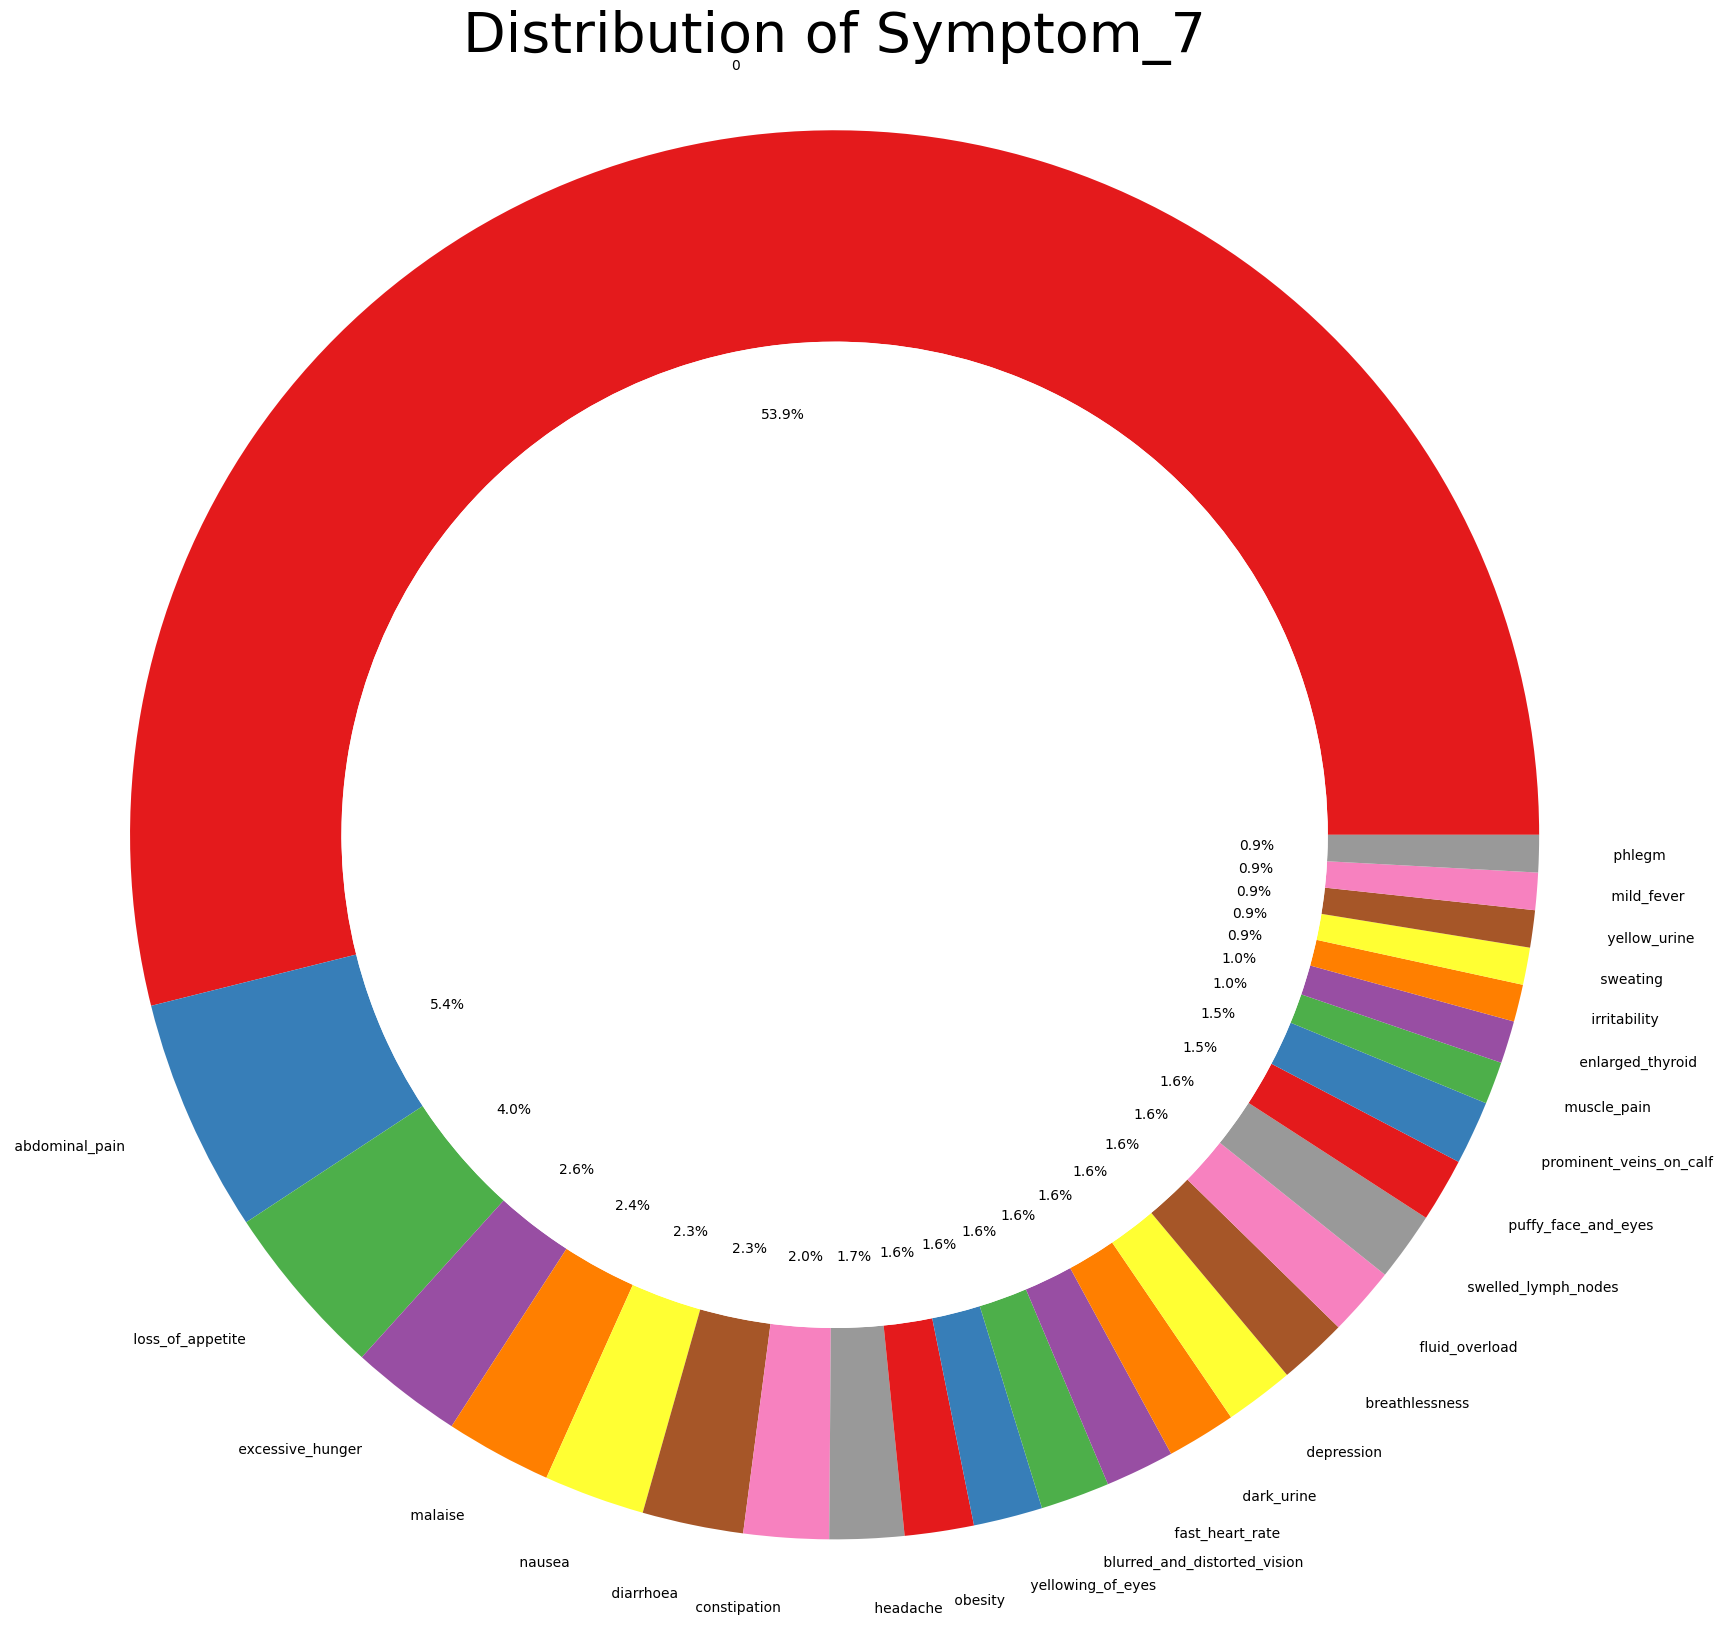

In [80]:
symptom_7_counts = df["Symptom_7"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))

outer_colors = plt.cm.Set1.colors[:len(symptom_7_counts)]
wedges, texts, autotexts = ax.pie(symptom_7_counts, labels=symptom_7_counts.index, autopct='%1.1f%%', 
                                  colors=outer_colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Distribution of Symptom_7",fontsize=40)
plt.show()

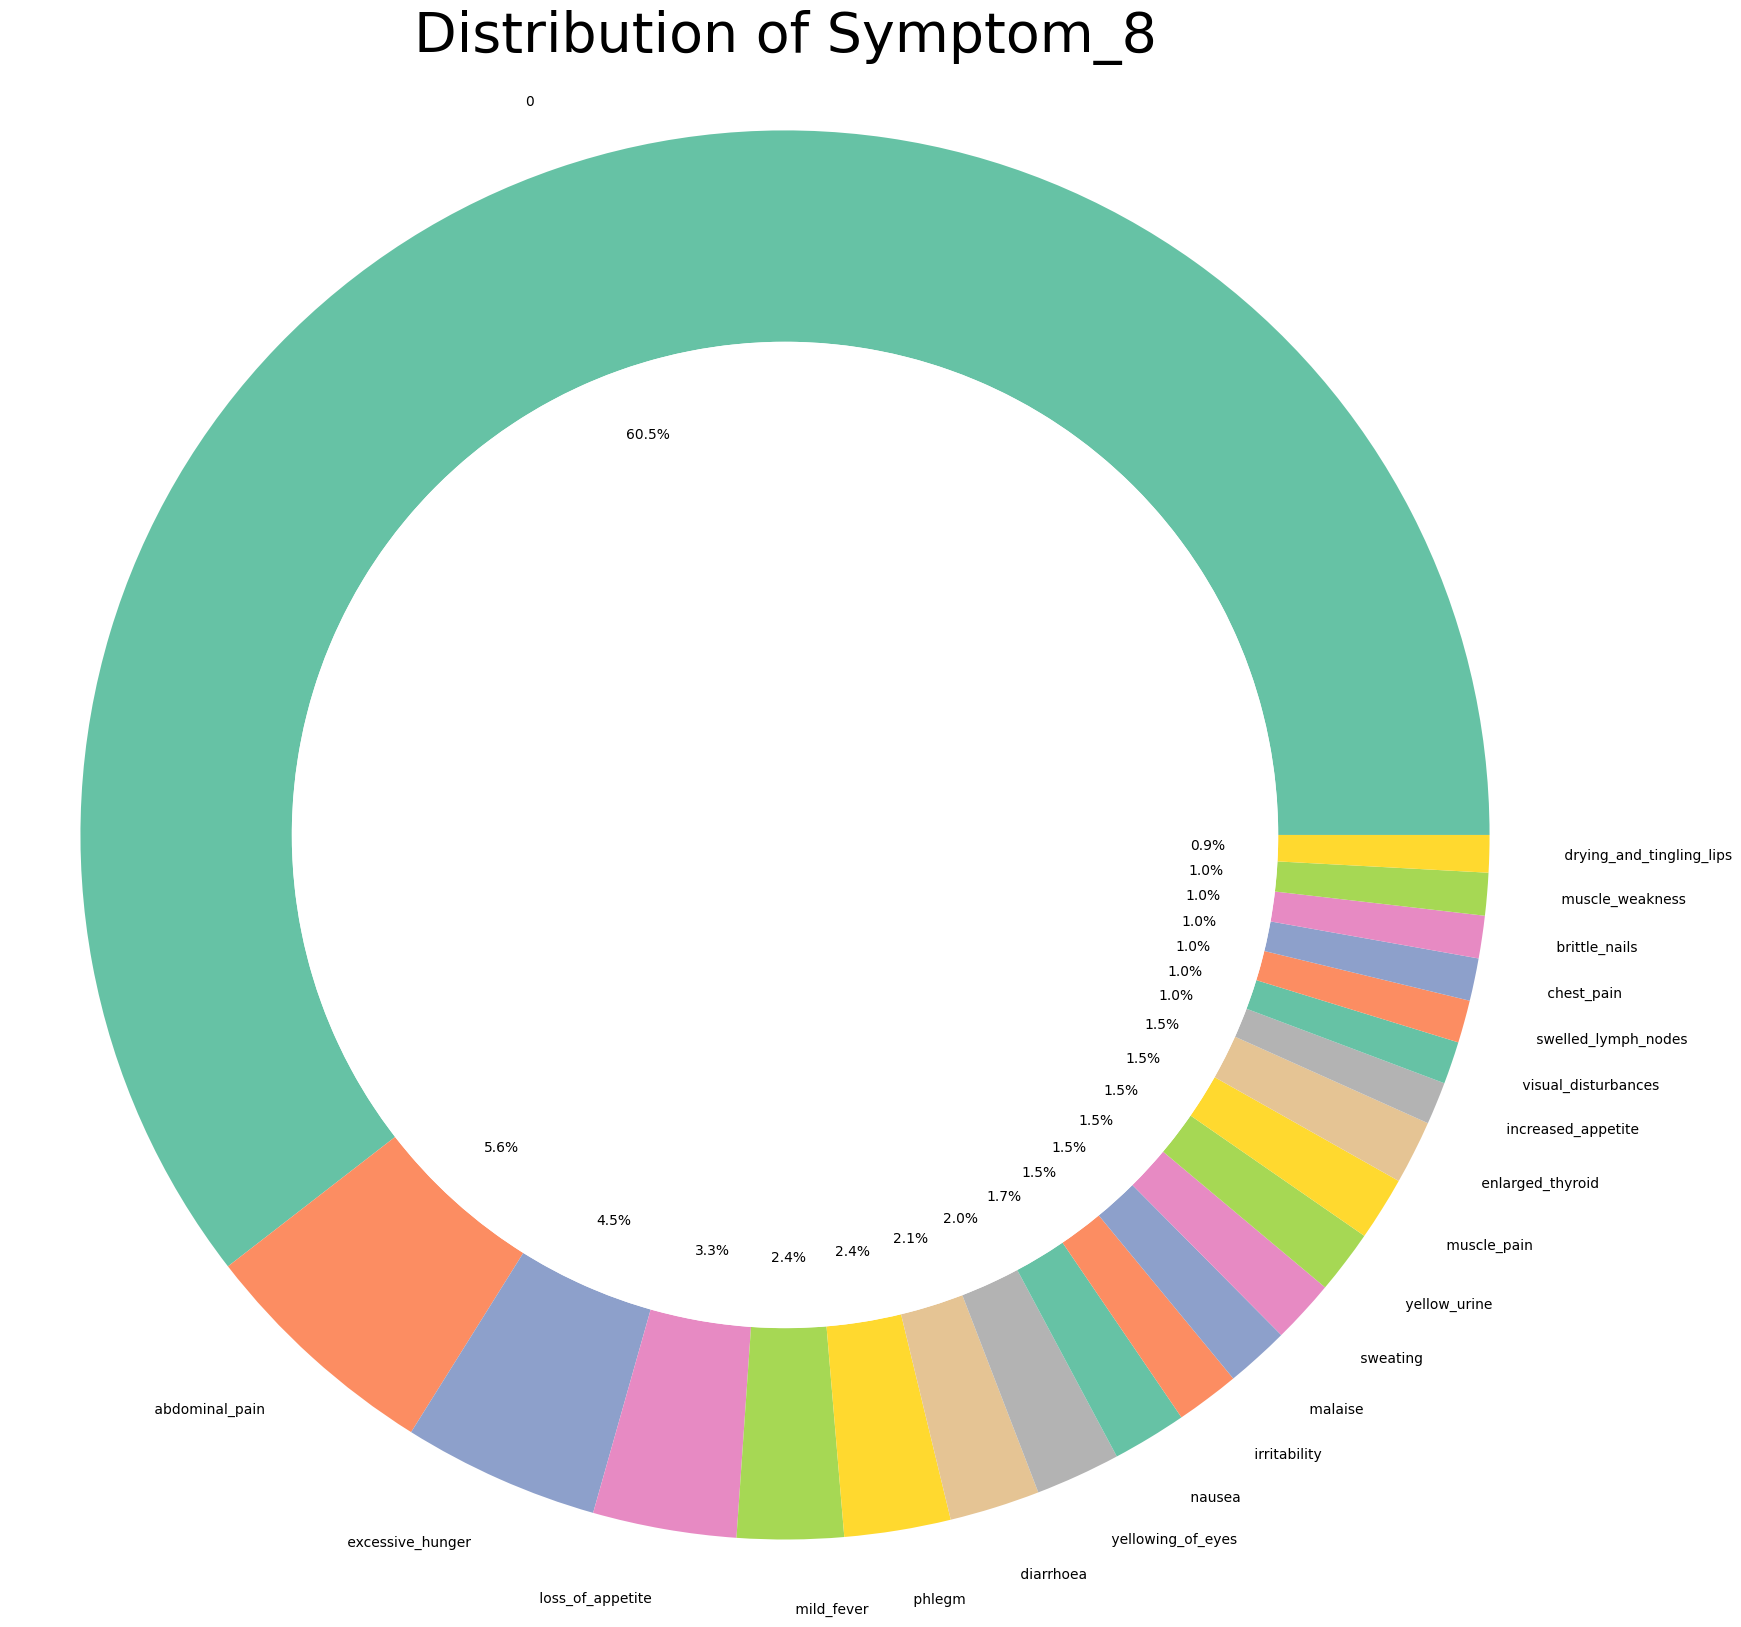

In [81]:
symptom_8_counts = df["Symptom_8"].value_counts()

plt.figure(figsize=(20,20))
colors = plt.cm.Set2.colors[:len(symptom_8_counts)]
plt.pie(symptom_8_counts, labels=symptom_8_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("Distribution of Symptom_8",fontsize=40)
plt.show()

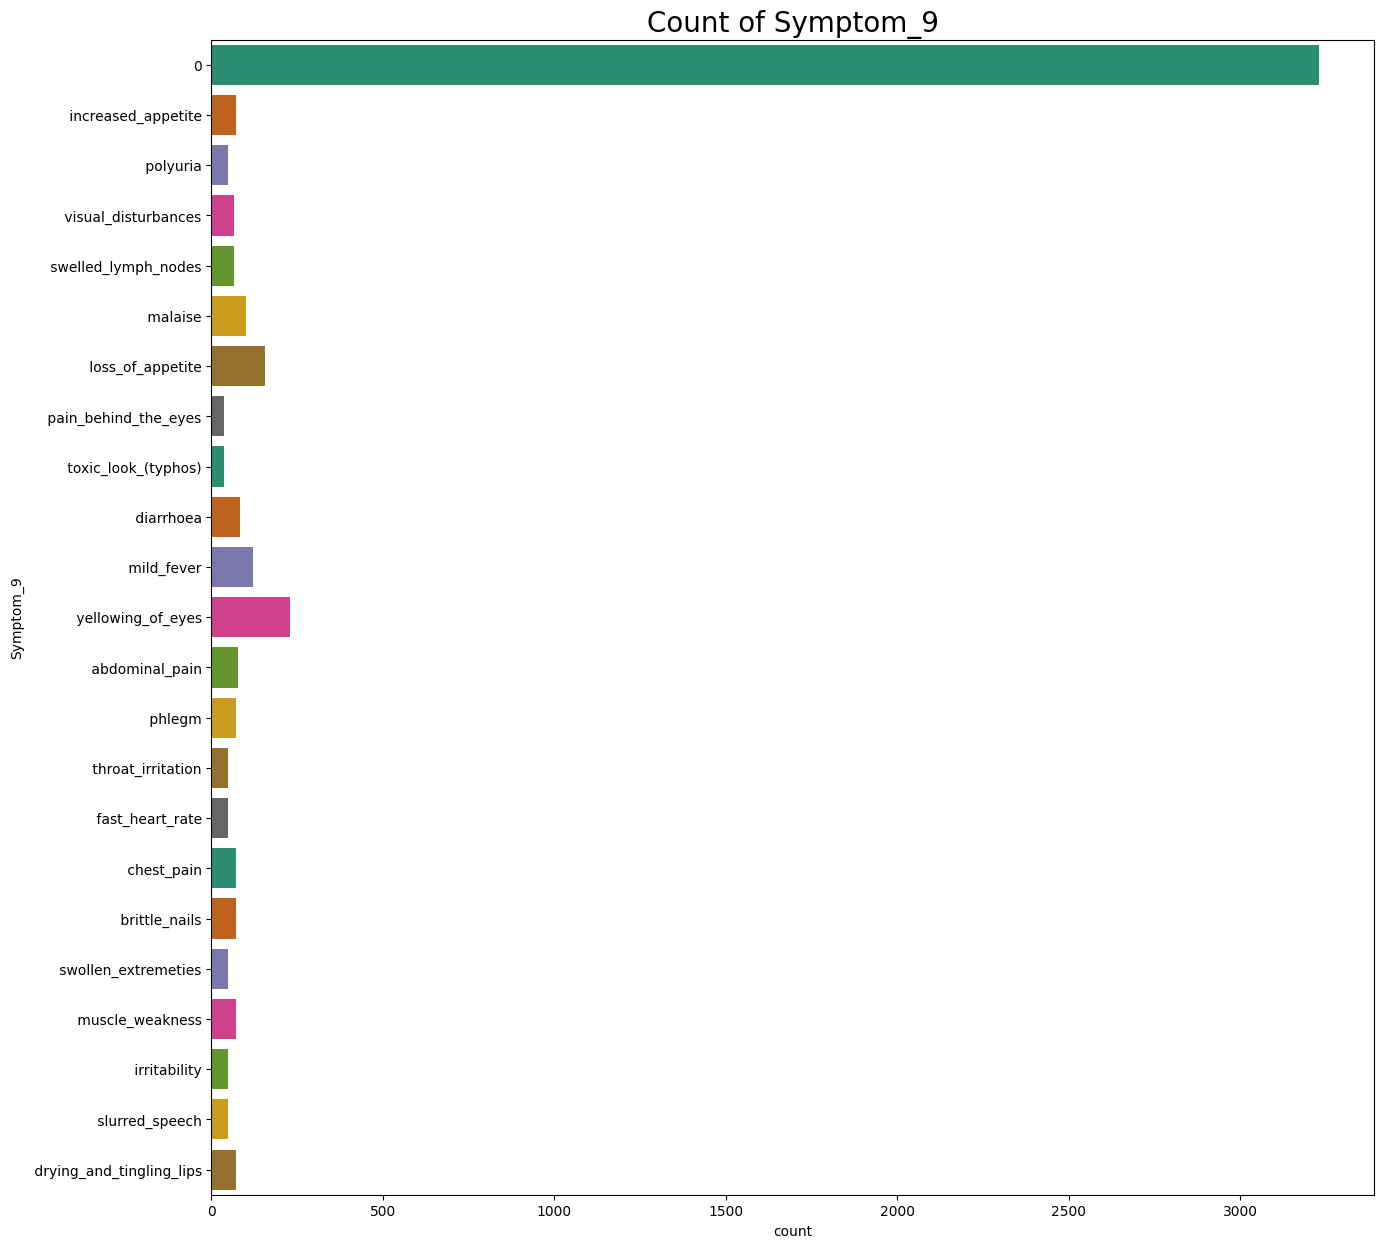

In [82]:
plt.figure(figsize=(15,15))
sns.countplot(y="Symptom_9", data=df, hue="Symptom_9", dodge=False, palette="Dark2", legend=False)
plt.title("Count of Symptom_9", fontsize=20)
plt.show()

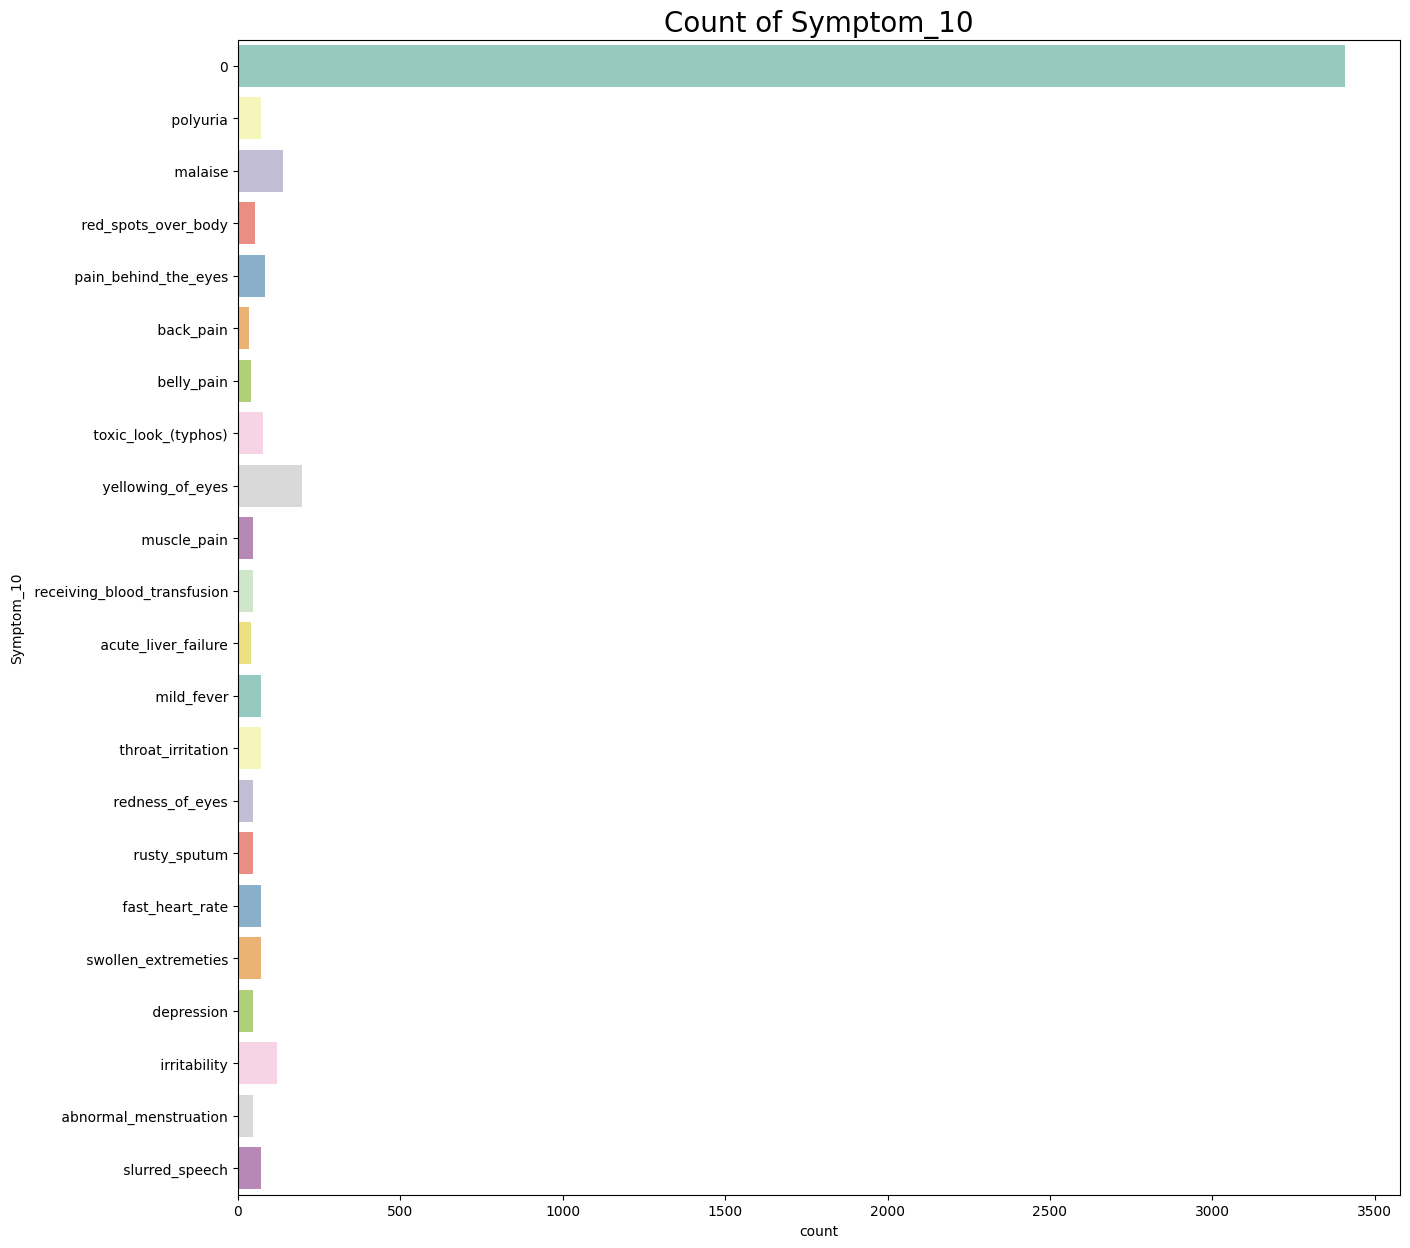

In [83]:
plt.figure(figsize=(15,15))
sns.countplot(y="Symptom_10", data=df, hue="Symptom_10", dodge=False, palette="Set3", legend=False)
plt.title("Count of Symptom_10", fontsize=20)
plt.show()

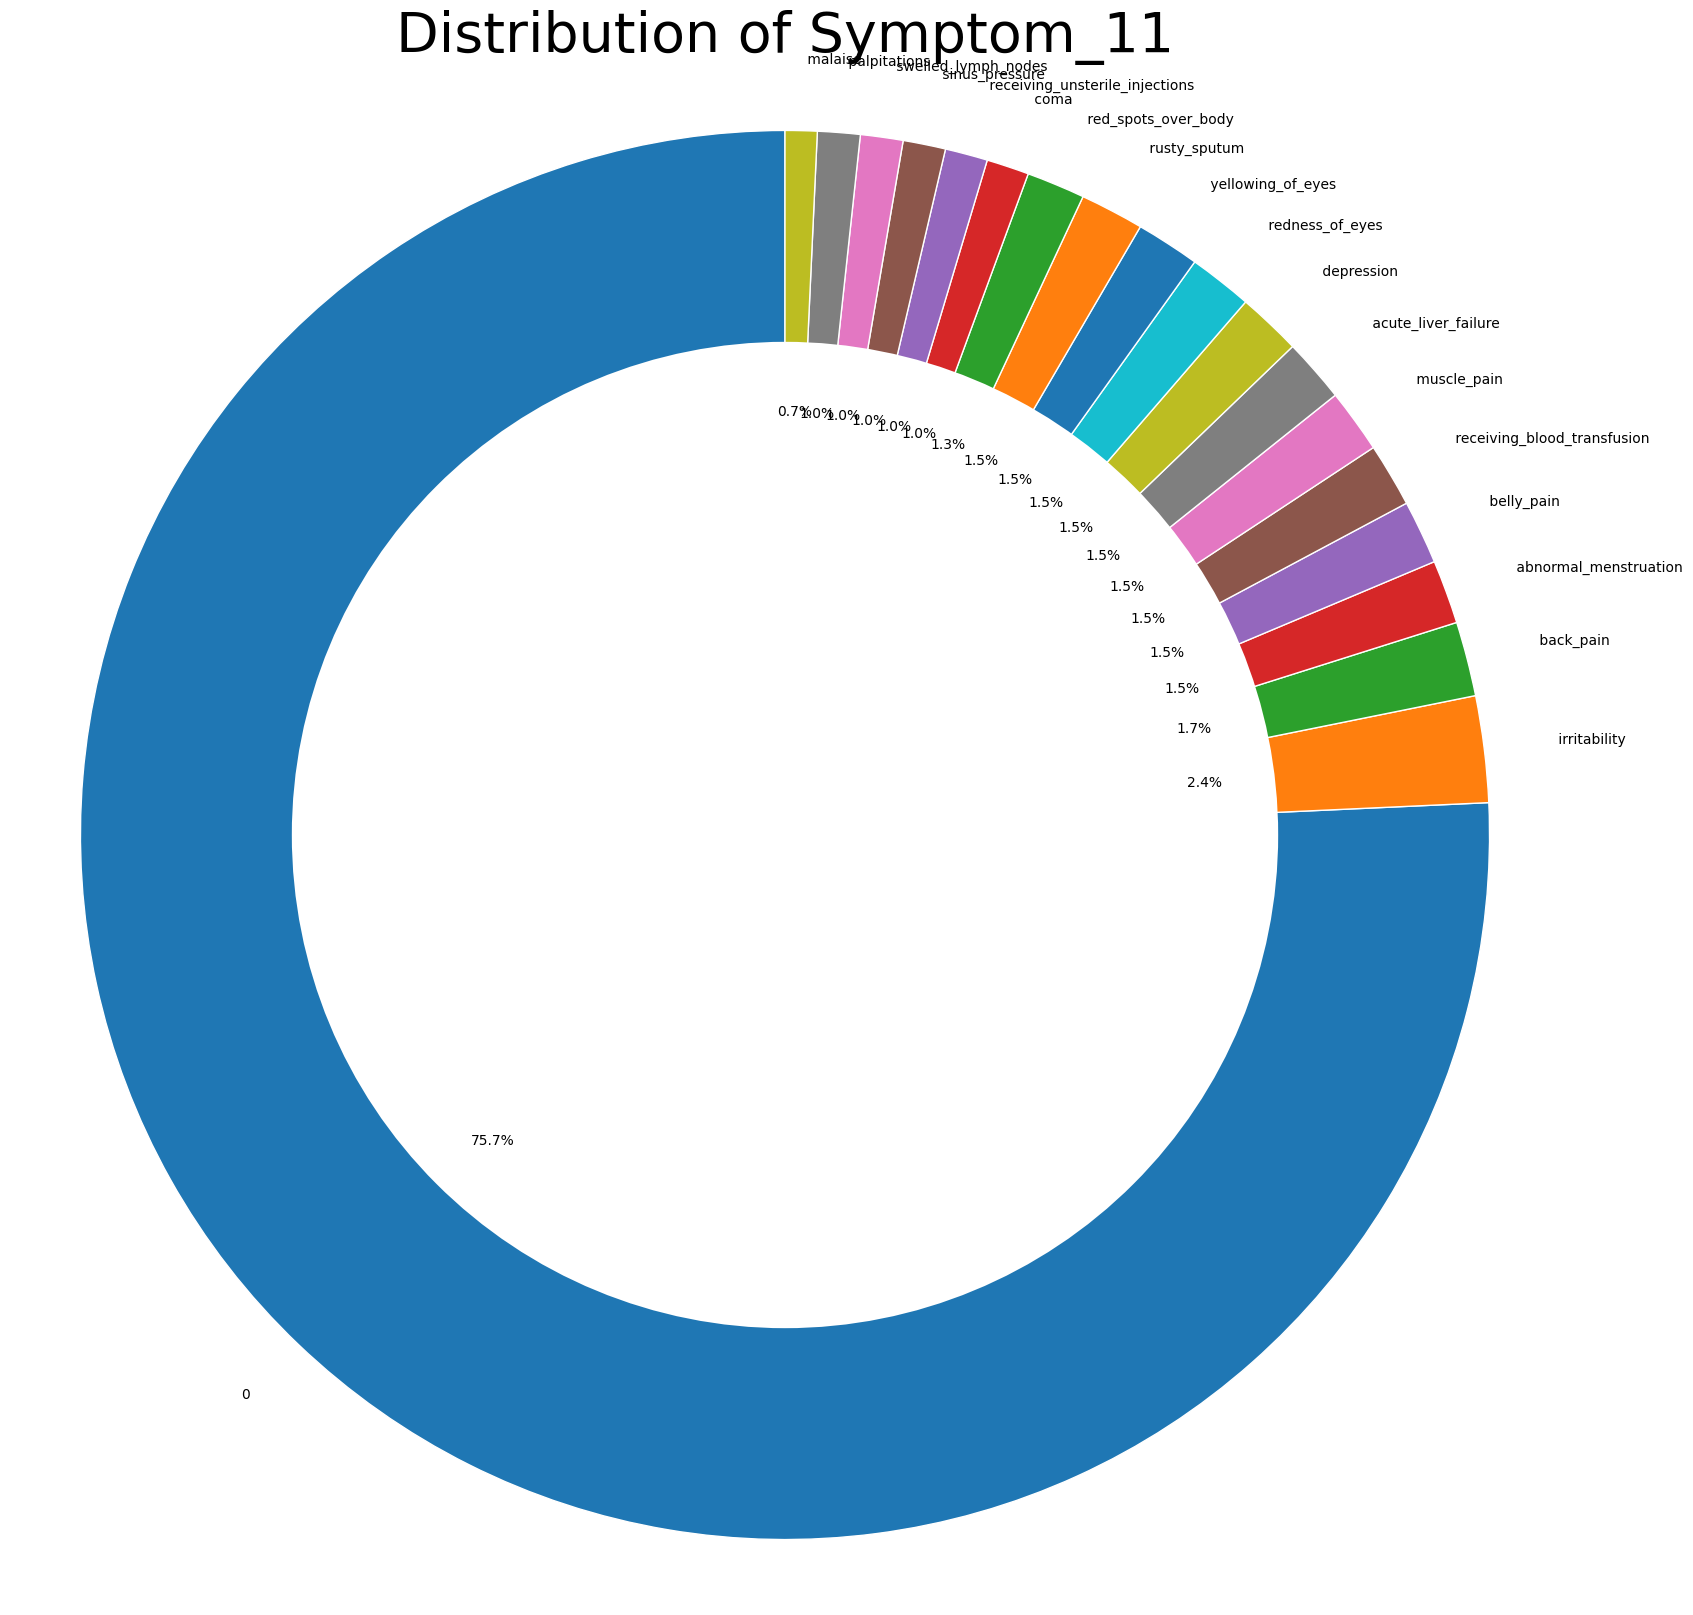

In [84]:
value_counts = df["Symptom_11"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_11',fontsize=40)
plt.show()

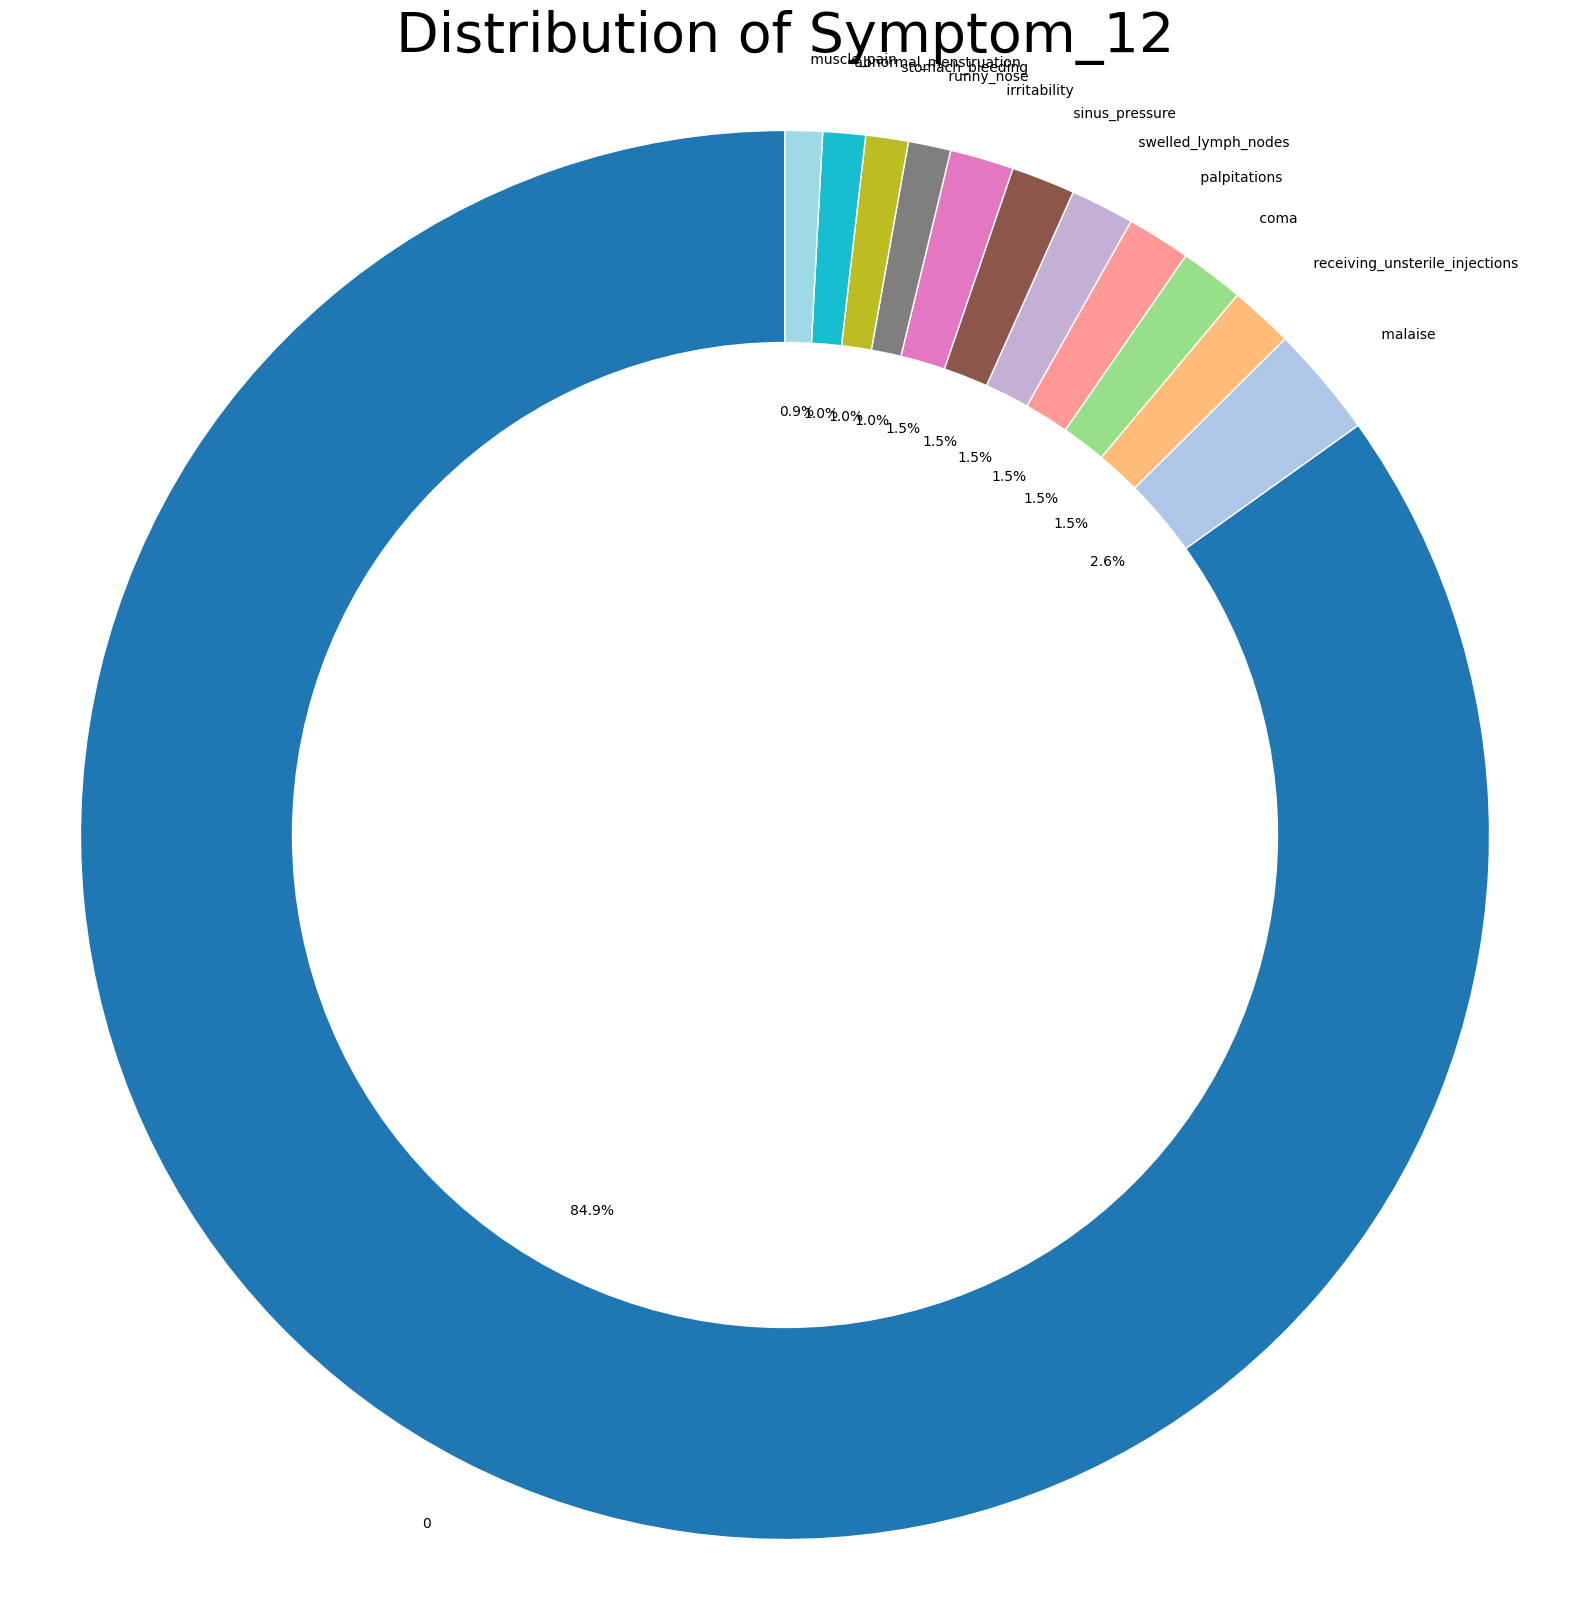

In [85]:
import numpy as np

value_counts = df["Symptom_12"].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(value_counts)))

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_12',fontsize=40)
plt.show()

In [86]:
df1 = pd.read_csv("../data/Symptom-severity.csv")
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [87]:
z=df1["Symptom"]

In [88]:
df1["Symptom"].value_counts()

Symptom
fluid_overload          2
itching                 1
nodal_skin_eruptions    1
skin_rash               1
continuous_sneezing     1
                       ..
inflammatory_nails      1
blister                 1
red_sore_around_nose    1
yellow_crust_ooze       1
prognosis               1
Name: count, Length: 132, dtype: int64

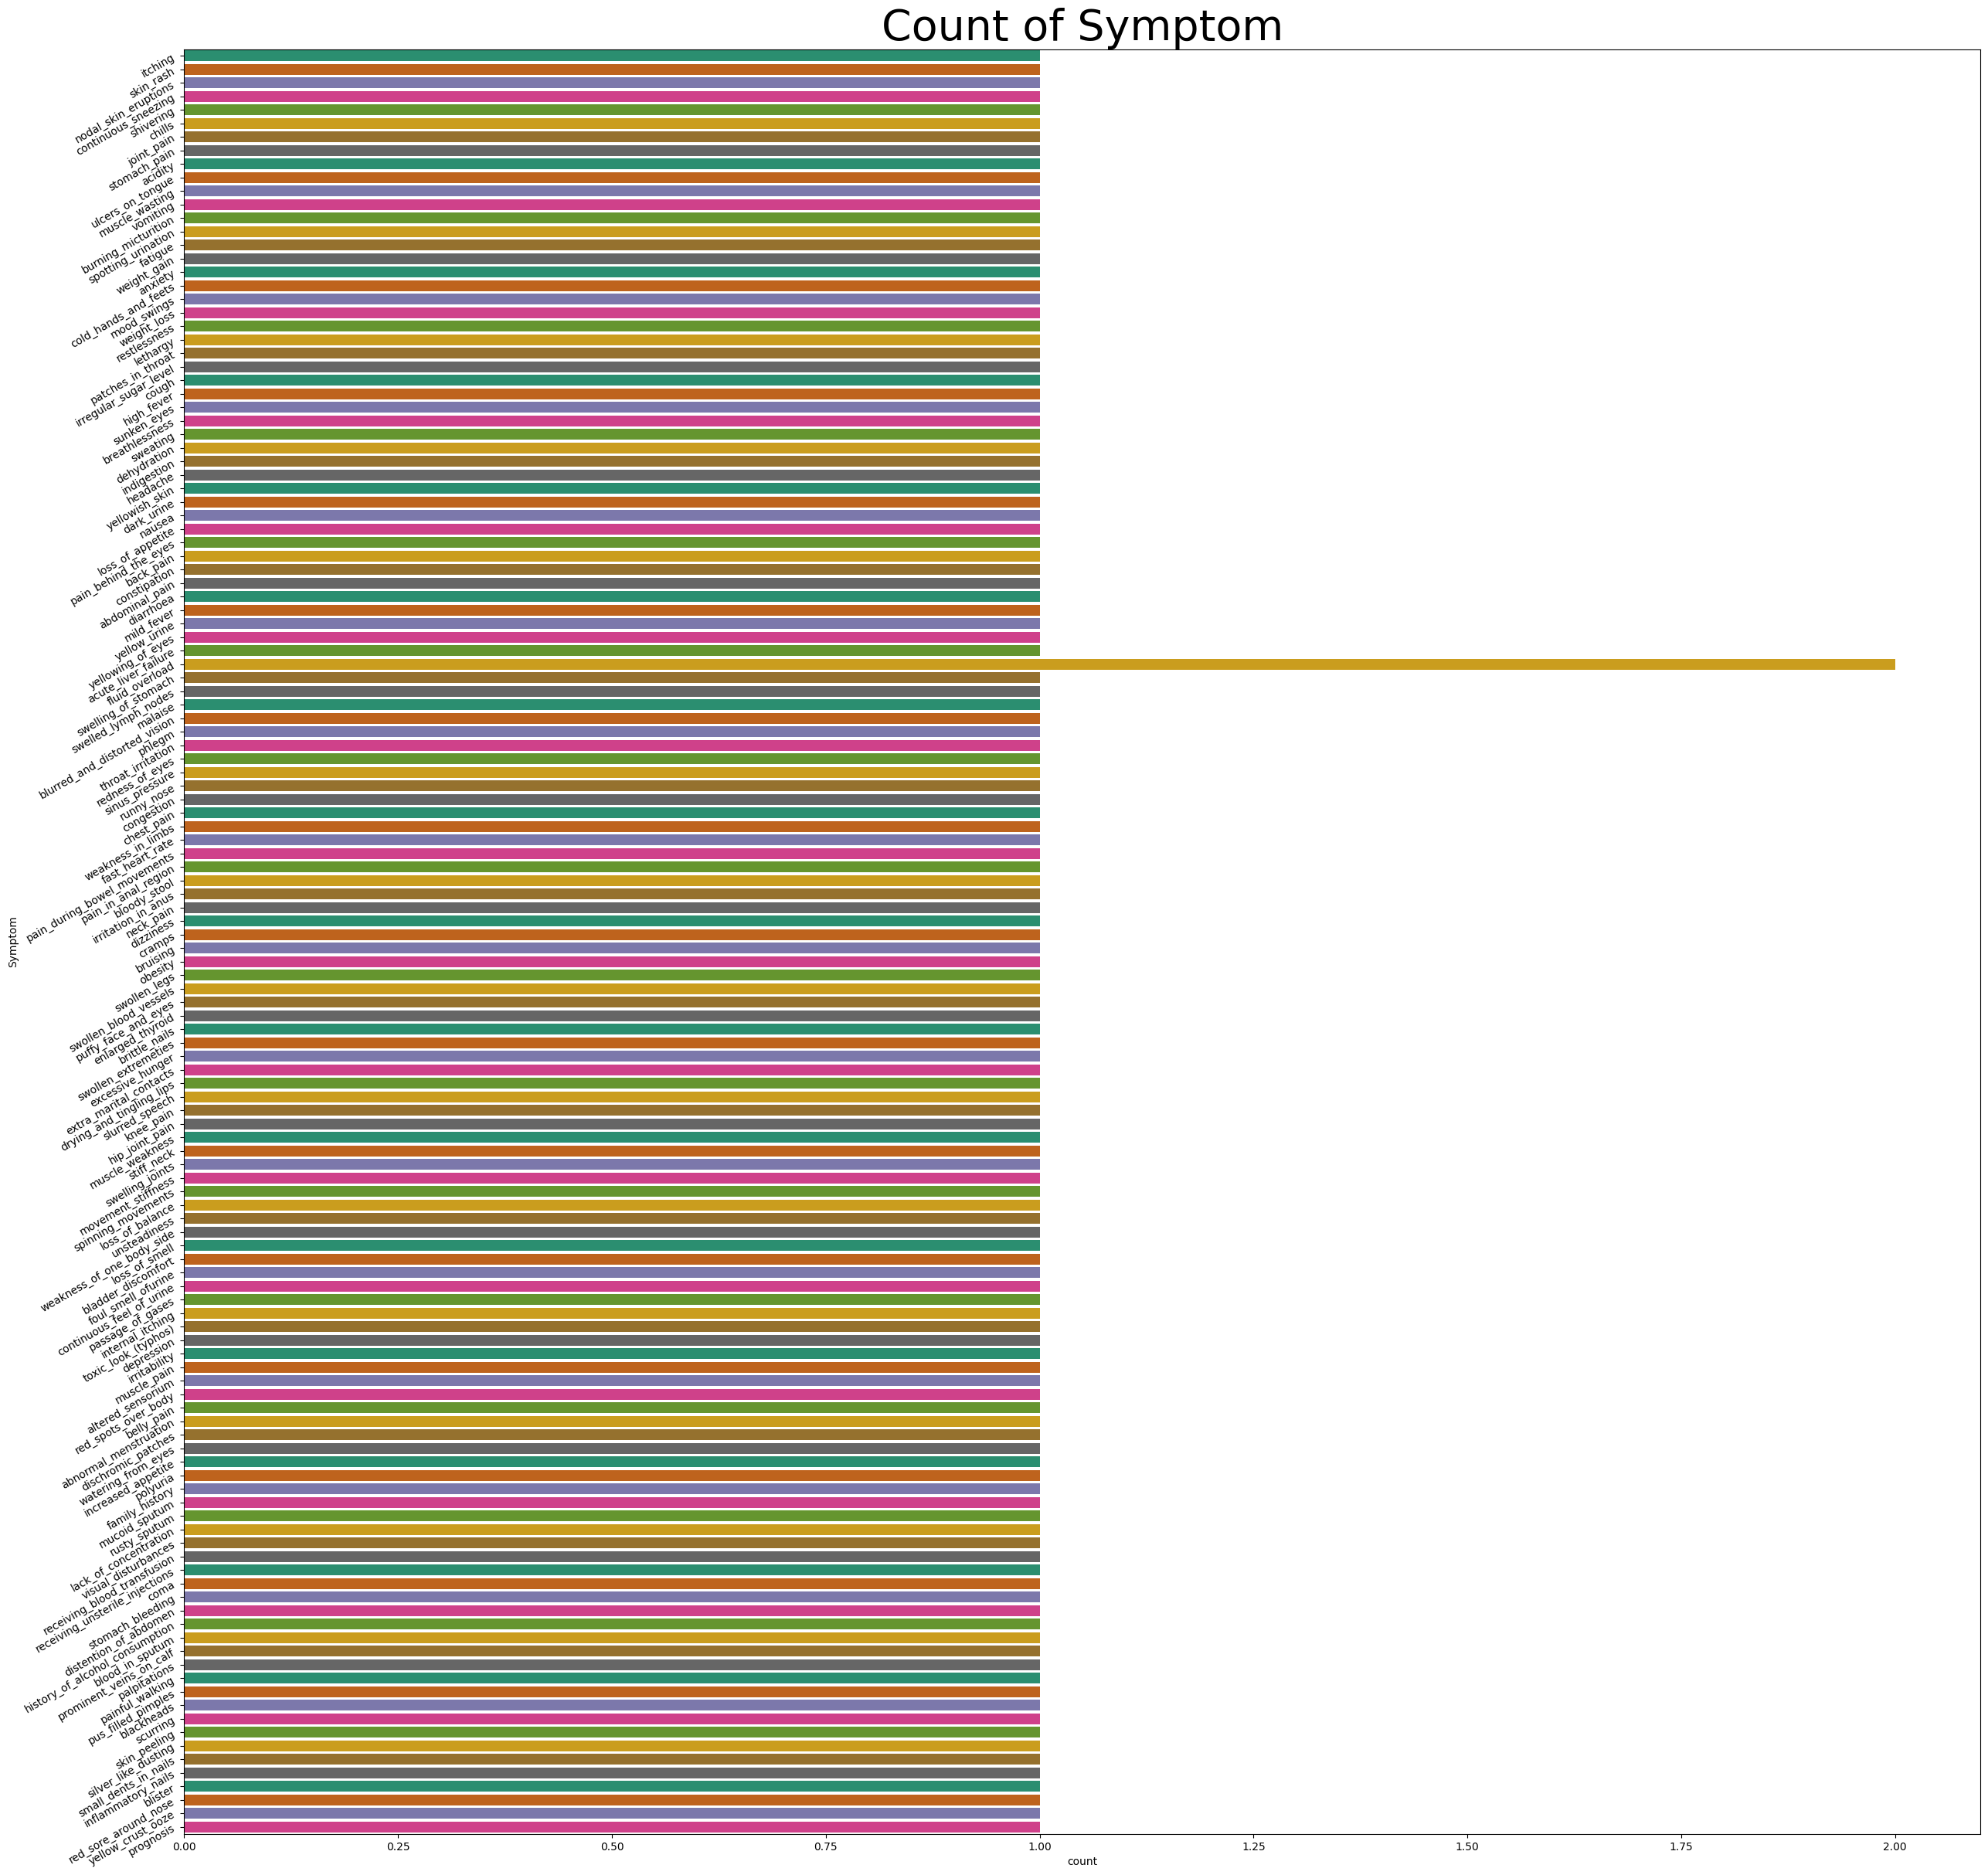

In [89]:
plt.figure(figsize=(30,30))
sns.countplot(y="Symptom", data=df1, hue="Symptom", dodge=False, palette="Dark2", legend=False)
plt.title("Count of Symptom", fontsize=40)
plt.yticks(rotation=30)
plt.show()

In [90]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
dfx

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
y=0
dfx[z]=0
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')

In [93]:
dfx.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
dfx.shape

(4920, 263)

In [95]:
dfx.isnull().sum()

Disease                  0
itching                  0
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Length: 263, dtype: int64

In [96]:
dfx.columns

Index(['Disease', 'itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=263)

In [97]:
label=df["Disease"]

le = LabelEncoder()
label=le.fit_transform(label)
label

array([15, 15, 15, ..., 38, 35, 27])

In [98]:
data=dfx.drop(columns="Disease",axis=1)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, train_size=0.6, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(data,label, test_size=0.2, random_state=42)

In [100]:
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_train shape: (3936, 262), X_test shape: (1968, 262)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
y_train shape: (3936,), y_test shape: (1968,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_val shape: (984, 262), y_val shape: (984,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


In [101]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [102]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'NaiveBayes': GaussianNB()
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    # Train and cross-validate
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: {cv_scores.mean():.3f}')
    
    # Train on the whole training set
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    print(f'{name} test F1 Score: {test_f1:.4f}, AUC-ROC Score: {test_roc:.4f}')
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    print(f'{name} validation F1 Score: {val_f1:.4f}, AUC-ROC Score: {val_roc:.4f}')
    
    # Ensure the ../models directory exists
    model_dir = '../models'
    os.makedirs(model_dir, exist_ok=True)
    
    # Save the model.pkl
    file_path = os.path.join(model_dir, f"{name}.pkl")
    with open(file_path, "wb") as f:
        pickle.dump(clf, f)
    
    print(f'Model has been saved to {file_path}')


# Iterate over classifiers and train/evaluate each one
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)
    print("\n")

Training and evaluating Random Forest...
Random Forest cross-validation mean F1 score: 1.000
Random Forest test F1 Score: 1.0000, AUC-ROC Score: 1.0000
Random Forest validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Model has been saved to ../models/Random Forest.pkl


Training and evaluating GradientBoost...
GradientBoost cross-validation mean F1 score: 1.000
GradientBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
GradientBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Model has been saved to ../models/GradientBoost.pkl


Training and evaluating ExtraTrees...
ExtraTrees cross-validation mean F1 score: 1.000
ExtraTrees test F1 Score: 1.0000, AUC-ROC Score: 1.0000
ExtraTrees validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Model has been saved to ../models/ExtraTrees.pkl


Training and evaluating NaiveBayes...
NaiveBayes cross-validation mean F1 score: 1.000
NaiveBayes test F1 Score: 1.0000, AUC-ROC Score: 1.0000
NaiveBayes validation F1 Score: 1.0000, AUC-ROC Score: 1.00

In [103]:
sd = pd.read_csv("../data/symptom_Description.csv")

In [104]:
sd.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [105]:
sp = pd.read_csv("../data/symptom_precaution.csv")

In [106]:
sp.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [107]:
def pred_result(m, X, sd, sp):
    # Predict probabilities for each class
    proba = m.predict_proba(X)
    
    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]
    
    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]
        
        print("Disease Name:", disease)
        print("Probability:", probability)
        
        if disease in sd["Disease"].unique():
            disp = sd[sd['Disease'] == disease].iloc[0, 1]
            print("Disease Description:", disp)
        
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precuation_list = sp.iloc[c, 1:].dropna().tolist()
            print("Recommended Things to do at home:")
            for precaution in precuation_list:
                print(f"- {precaution}")
        
        print("\n")

In [108]:
x=dfx.columns[1:]
x

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=262)

In [109]:
print(x.tolist())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [110]:
len(x)

262

In [111]:
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [112]:
len(y)

41

In [113]:
def main():
    t = pd.Series([0] * len(x), index=x)  # Adjust the length to match `x`
    with open("../models/NaiveBayes.pkl", 'rb') as f:
        m = pickle.load(f)
    
    # Modify t for specific symptoms
    symptoms_to_include = ["belly_pain", "movement_stiffness", "runny_nose", "high_fever", "mild_fever", "sweating", "redness_of_eyes"]
    t.loc[symptoms_to_include] = 1
    
    # Convert t to numpy array and reshape
    t_array = t.to_numpy().reshape(1, -1)
    
    # Call pred_result function
    pred_result(m, t_array, sd, sp)

if __name__ == "__main__":
    main()

Disease Name: Fungal infection
Probability: 0.517530099860342
Disease Description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
Recommended Things to do at home:
-bath twice
-use detol or neem in bathing water
-keep infected area dry
-use clean cloths


Disease Name: Allergy
Probability: 0.4202413065698479
Disease Description: An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.
Recommended Things to do at home:
-apply calamine
-cover area with bandage
-use ice to compress itching


Disease Name: Gastroenteritis
Probability: 0.0469072